In [38]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
%cd yolov5

C:\Users\Fuzail\yolov5


In [3]:
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


In [4]:
!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output
from utils.downloads import attempt_download 

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

C:\Users\Fuzail\anaconda3\envs\yolov7\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete. Using torch 1.13.0 _CudaDeviceProperties(name='NVIDIA GeForce GTX 1650 Ti', major=7, minor=5, total_memory=4095MB, multi_processor_count=16)


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CeQDKsGUUquOOTYsnKkF")
project = rf.workspace("spt-mw0cf").project("pedestrian-detection-e0rdy")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to pedestrian-detection-1 in yolov5pytorch:: 100%|██████████| 1612/1612 [00:01<00:00, 855.22it/s]


In [6]:
%cd yolov5

C:\Users\Fuzail\yolov5\yolov5


In [7]:
%pycat {dataset.location}/data.yaml

names:
- person
nc: 1
roboflow:
  license: CC BY 4.0
  project: pedestrian-detection-e0rdy
  url: https://universe.roboflow.com/spt-mw0cf/pedestrian-detection-e0rdy/dataset/1
  version: 1
  workspace: spt-mw0cf
test: ../test/images
train: pedestrian-detection-1/train/images
val: pedestrian-detection-1/valid/images


In [8]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [9]:
%pycat C:/Users/Fuzail/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [10]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [11]:
%%writetemplate C:/Users/Fuzail/yolov5/models/yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [12]:
!git pull https://github.com/ultralytics/yolov5

Updating 5e03f5f..5dc1ce4
Fast-forward
 .github/README_cn.md                   |    2 +-
 CITATION.cff                           |   14 +
 README.md                              |  154 +++-
 classify/predict.py                    |    7 +-
 classify/train.py                      |    8 +-
 classify/tutorial.ipynb                | 1479 +++++++++++++++++++++++++++++++
 classify/val.py                        |    5 +-
 data/scripts/download_weights.sh       |    5 +-
 detect.py                              |    5 +-
 export.py                              |    3 +-
 models/common.py                       |    2 +-
 requirements.txt                       |    1 +
 segment/predict.py                     |   35 +-
 segment/train.py                       |   18 +-
 segment/tutorial.ipynb                 | 1493 ++++++++++++--------------------
 segment/val.py                         |   20 +-
 train.py                               |   13 +-
 tutorial.ipynb                         |  333 ++++-

From https://github.com/ultralytics/yolov5
 * branch            HEAD       -> FETCH_HEAD


In [13]:
# train yolov5s on custom data for 100 epochs
# time its performance

%time
%cd C:\Users\Fuzail\yolov5
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

CPU times: total: 0 ns
Wall time: 0 ns
C:\Users\Fuzail\yolov5


train: weights='', cfg=./models/yolov5s.yaml, data=C:\Users\Fuzail\yolov5\pedestrian-detection-1/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   5e03f5f..5dc1ce4  master          -> origin/master
 * [new branch]      exp12           -> origin/exp12
 * [new branch]      exp13           -> origin/exp13
   aa723e4..2e3c515  ultralytics/HUB -> origin/ultralytics/HUB
   3d1b364..3d89282  update/threaded -> origin/update/threaded
 * [new tag]   

In [52]:
%ls C:\Users\Fuzail\yolov5\runs

 Volume in drive C is OS
 Volume Serial Number is 44F4-B4E7

 Directory of C:\Users\Fuzail\yolov5\runs

12-11-2022  11:25 PM    <DIR>          .
16-11-2022  06:14 PM    <DIR>          ..
16-11-2022  06:45 PM    <DIR>          train
               0 File(s)              0 bytes
               3 Dir(s)  227,004,293,120 bytes free


In [24]:
%ls C:\Users\Fuzail\yolov5\runs\train\yolov5s_results3\weights

 Volume in drive C is OS
 Volume Serial Number is 44F4-B4E7

 Directory of C:\Users\Fuzail\yolov5\runs\train\yolov5s_results3\weights

04-12-2022  11:12 AM    <DIR>          .
04-12-2022  12:04 PM    <DIR>          ..
04-12-2022  12:04 PM        14,771,673 best.pt
04-12-2022  12:04 PM        14,771,673 last.pt
               2 File(s)     29,543,346 bytes
               2 Dir(s)  223,883,677,696 bytes free


In [25]:
%cd yolov5
!python detect.py --weights C:\Users\Fuzail\yolov5\runs\train\yolov5s_results3\weights\best.pt --img 416 --conf 0.4 --source C:\Users\Fuzail\yolov5\pedestrian-detection-1\test\images

C:\Users\Fuzail\yolov5\yolov5


detect: weights=['C:\\Users\\Fuzail\\yolov5\\runs\\train\\yolov5s_results3\\weights\\best.pt'], source=C:\Users\Fuzail\yolov5\pedestrian-detection-1\test\images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...


     -------------------------------------- 182.5/182.5 kB 3.7 MB/s eta 0:00:00



     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00






requirements: 1 package updated per C:\Users\Fuzail\yolov5\yolov5\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  v6.2-291-g5dc1ce4 Python-3.9.13 

In [26]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

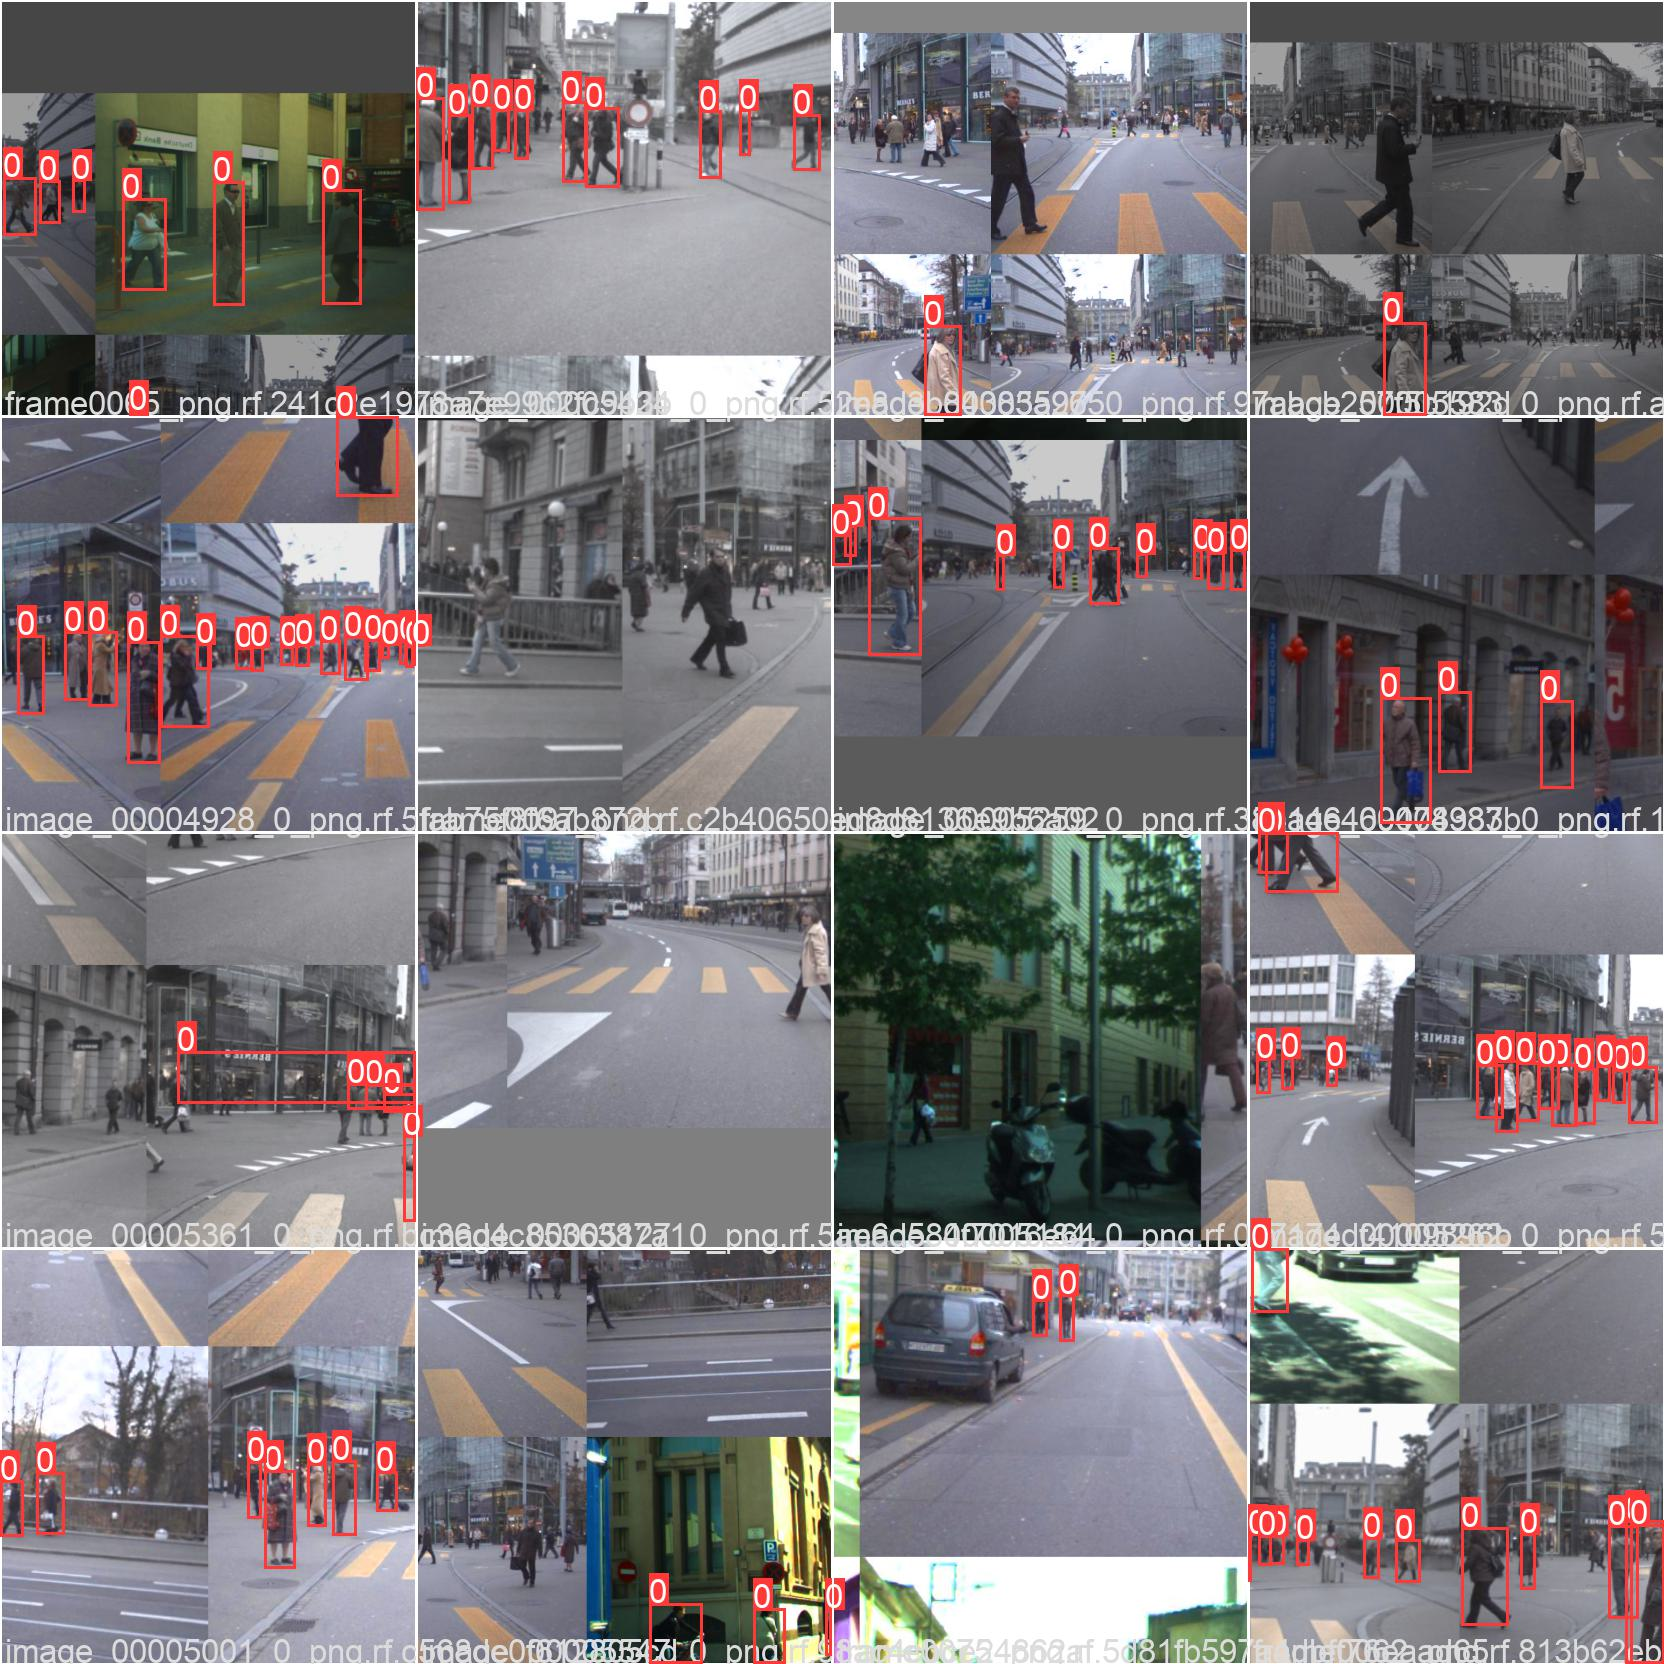

In [27]:
Image(filename= 'C:/Users/Fuzail/yolov5/runs/train/yolov5s_results3/train_batch1.jpg', width=1000)

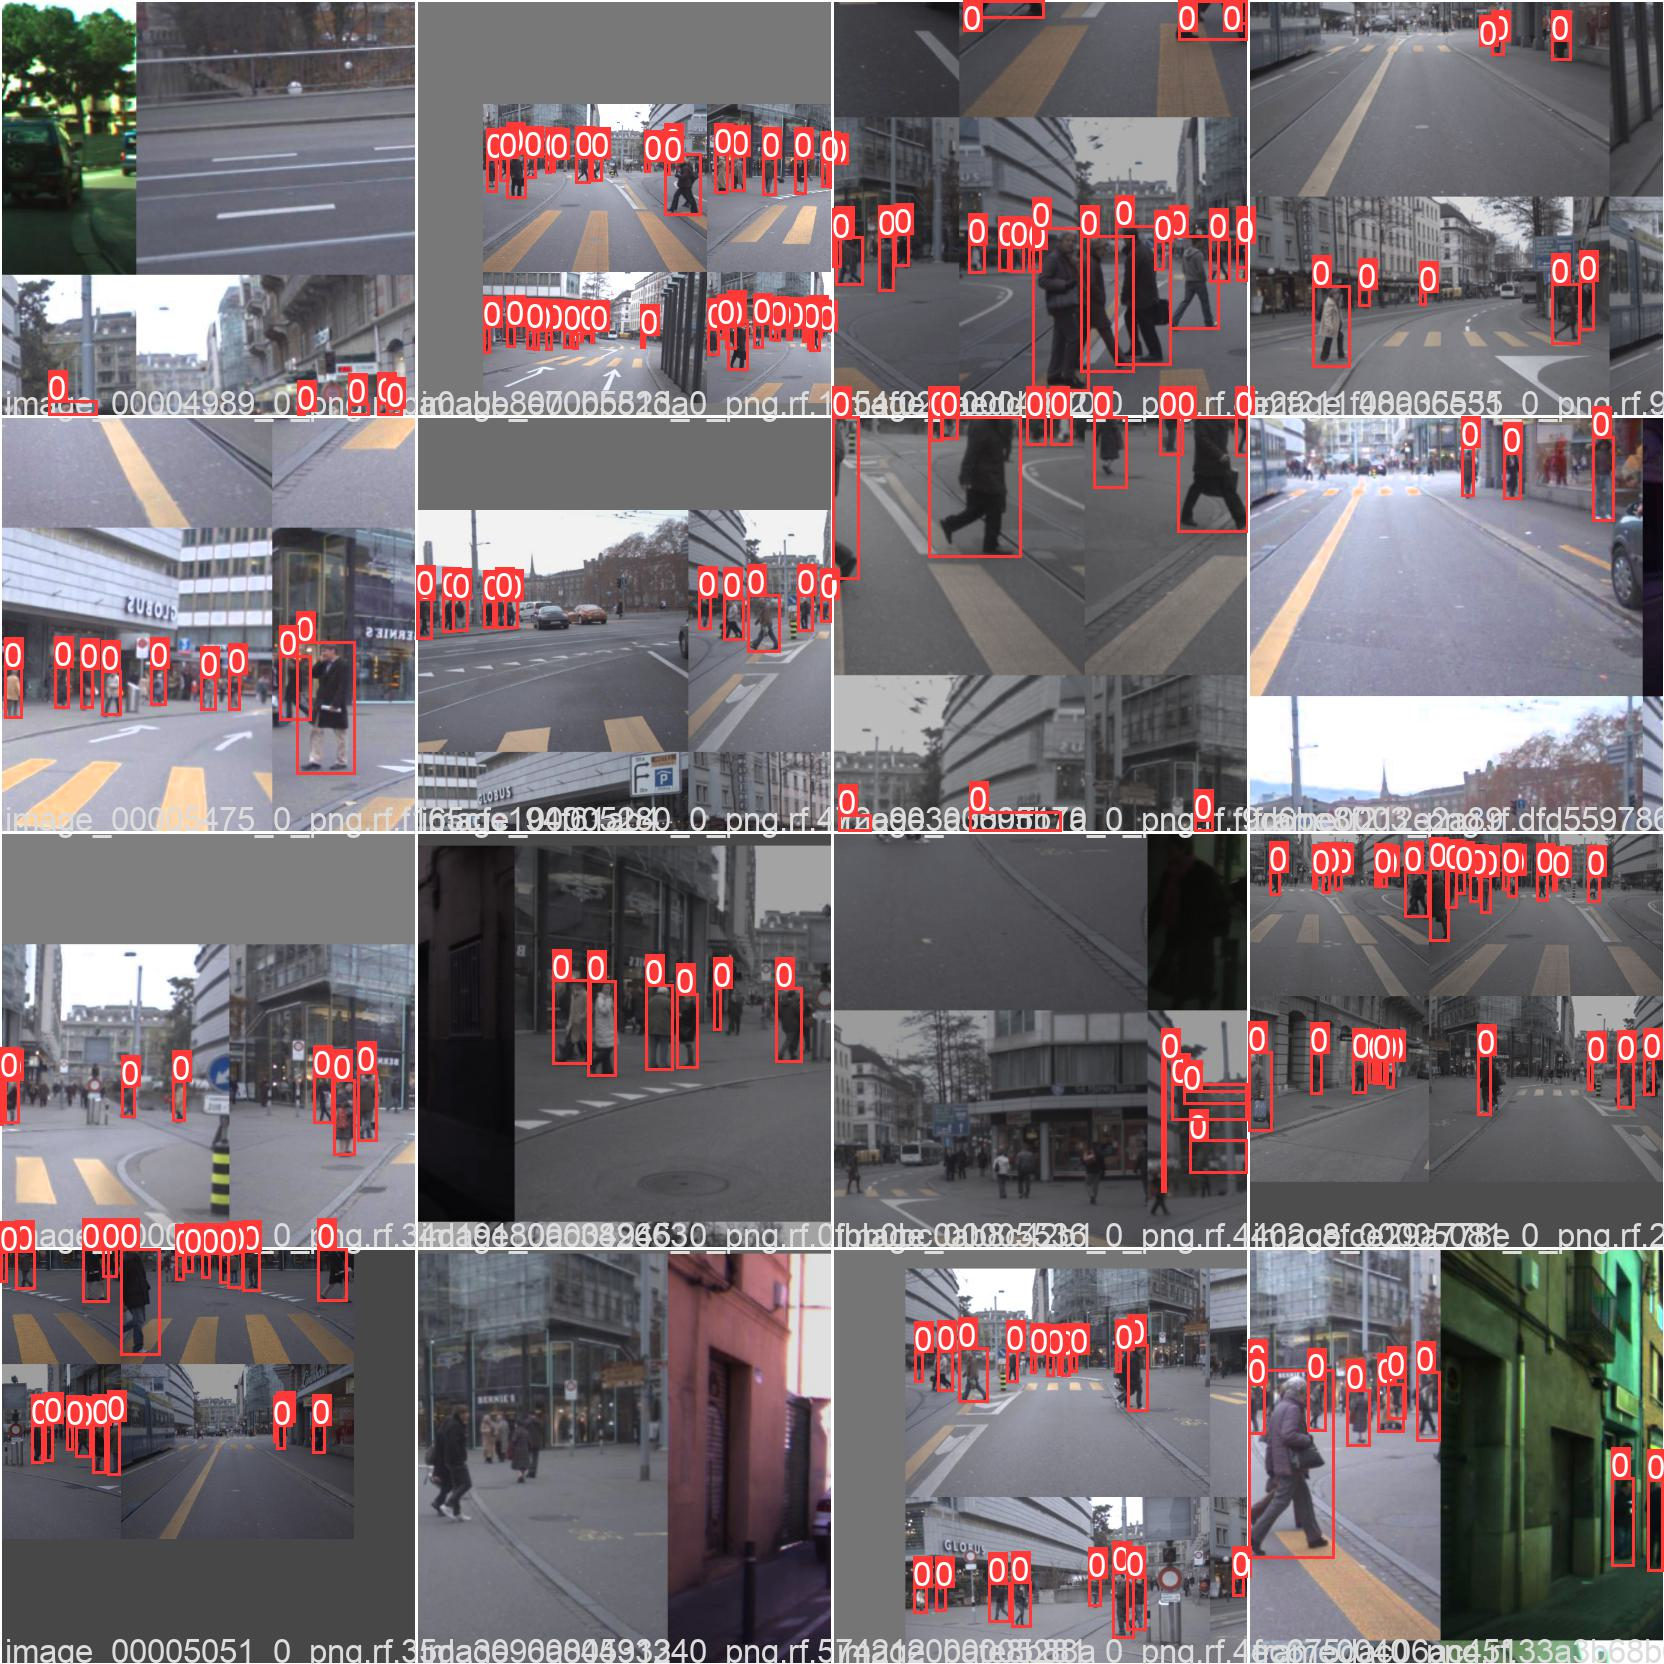

In [28]:
Image(filename='C:/Users/Fuzail/yolov5/runs/train/yolov5s_results3/train_batch2.jpg', width=1000)

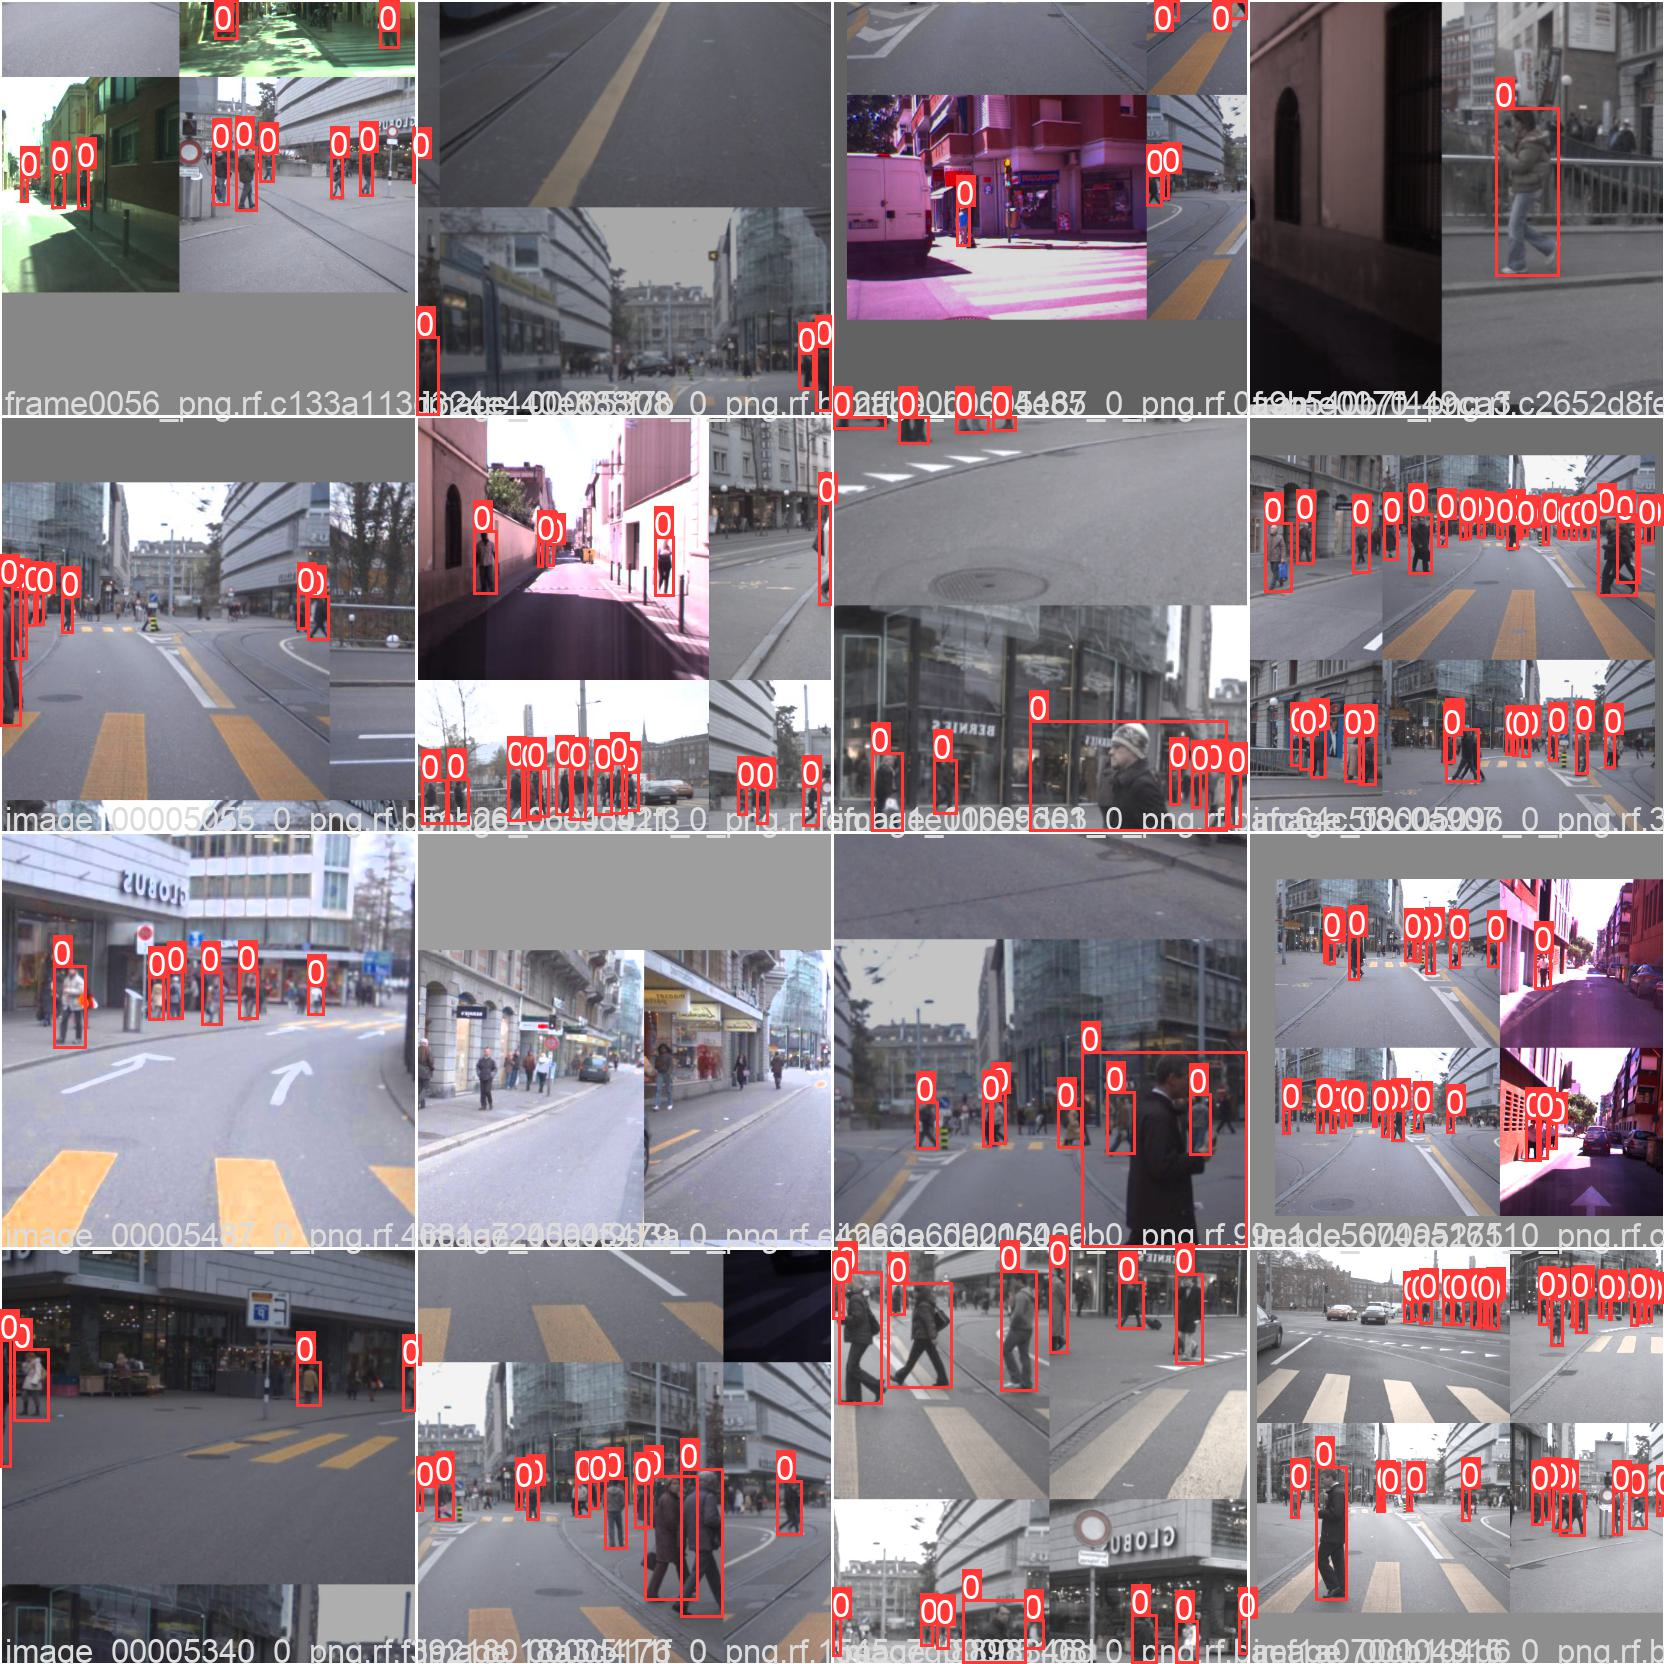

In [29]:
Image(filename='C:/Users/Fuzail/yolov5/runs/train/yolov5s_results3/train_batch0.jpg', width=1000)

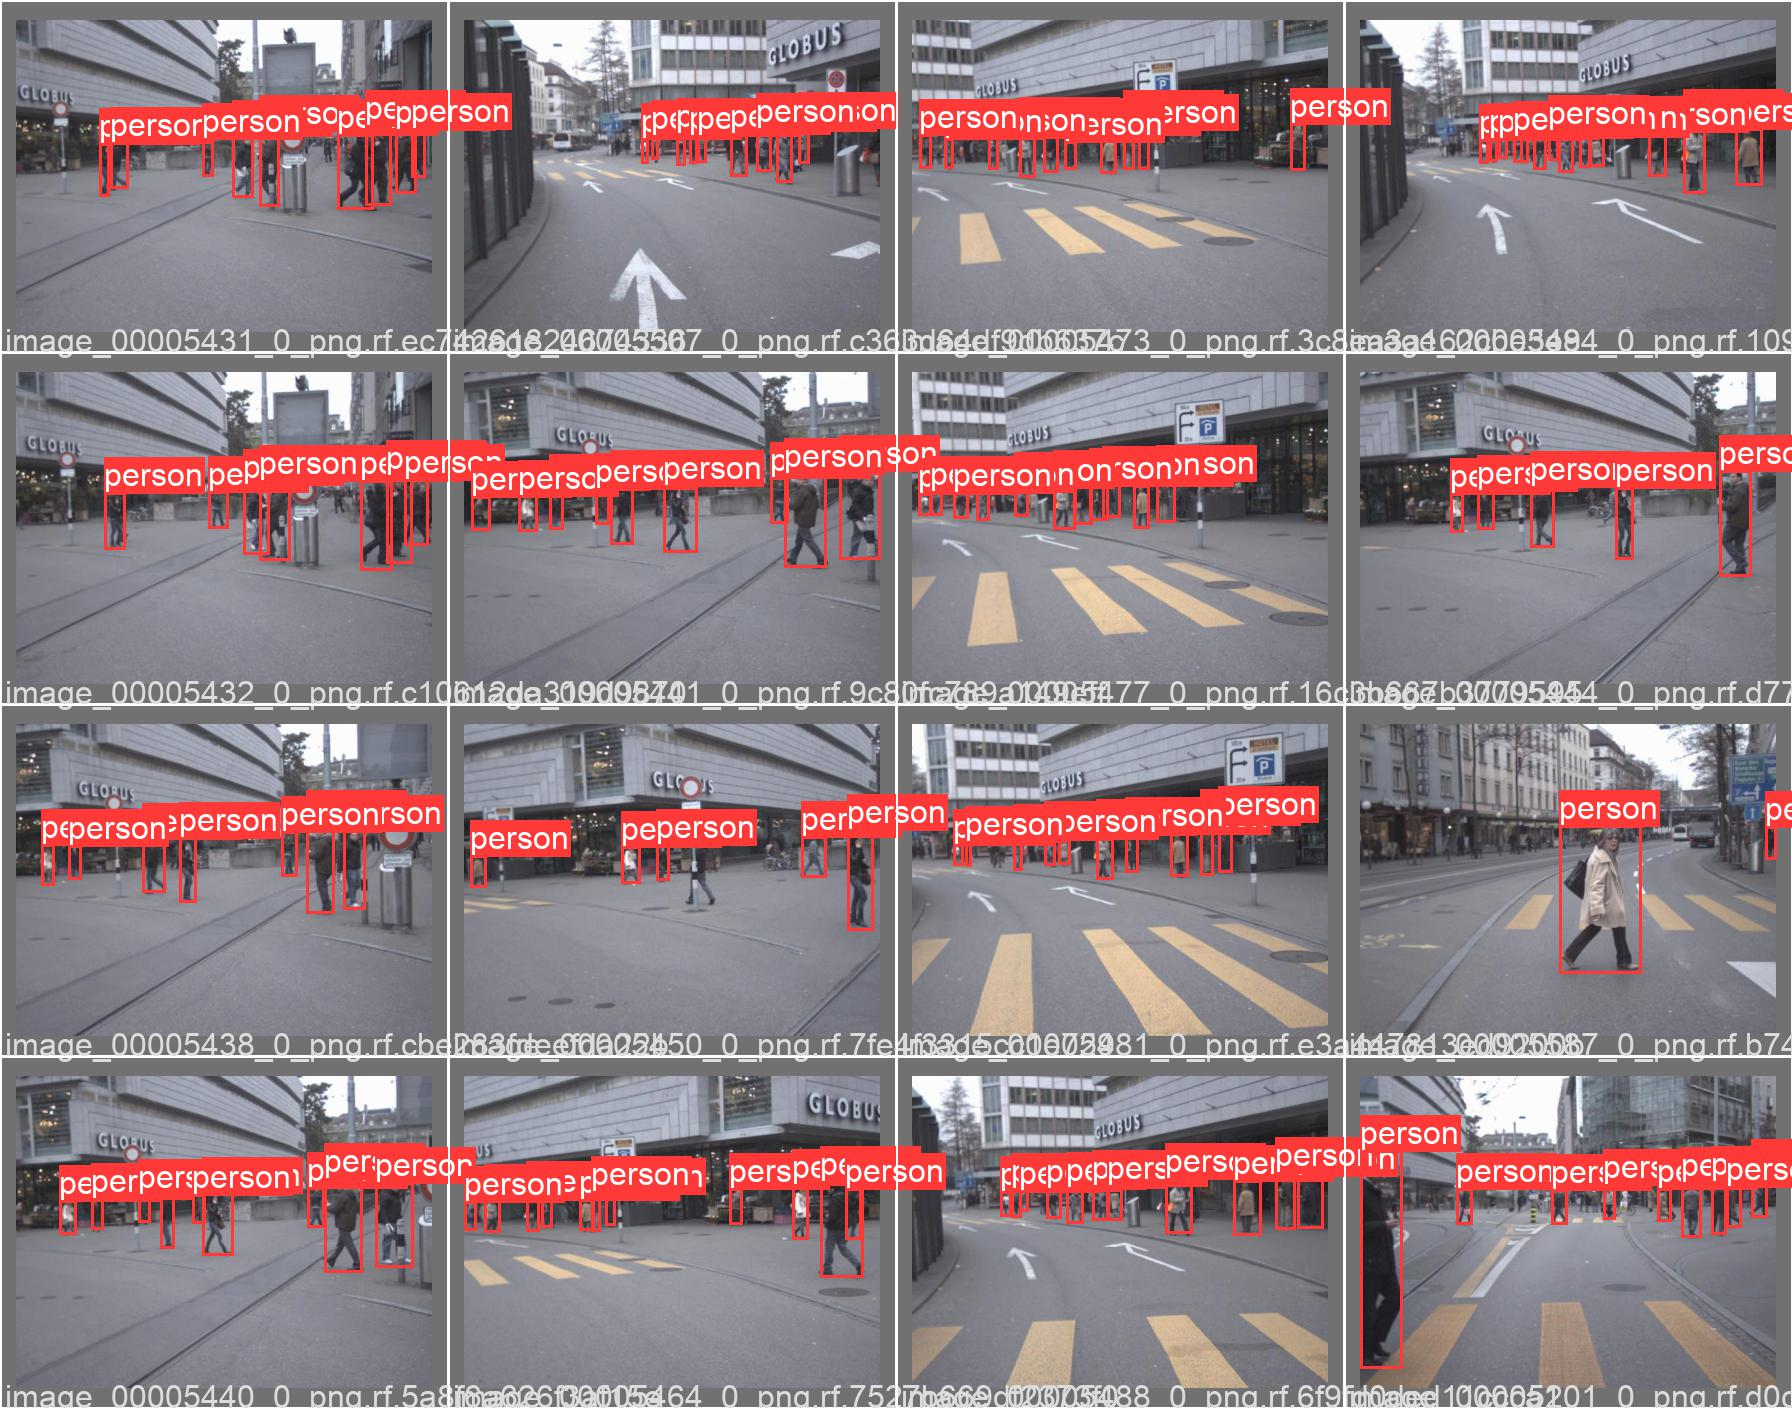

In [30]:
Image(filename='C:/Users/Fuzail/yolov5/runs/train/yolov5s_results3/val_batch2_labels.jpg', width=1000)